# Esports Earning Analysis
>>Datasets
- country-and-continent-codes-list.csv
- highest_earning_players.csv
- highest_earning_teams.csv

### Import liabraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)
plt.style.use('ggplot')

### Clean dataframe (# datasets 1)

In [5]:
# Read in the data
team = pd.read_csv('./datasets/highest_earning_teams.csv')
players = pd.read_csv('./datasets/highest_earning_players.csv')
country_continent = pd.read_csv('./datasets/country-and-continent-codes-list.csv')

In [6]:
team

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


### Clean dataframe (# datasets 2)

In [7]:
hist = pd.read_csv('./datasets/HistoricalEsportData.csv')
general = pd.read_csv('./datasets/GeneralEsportData.csv')

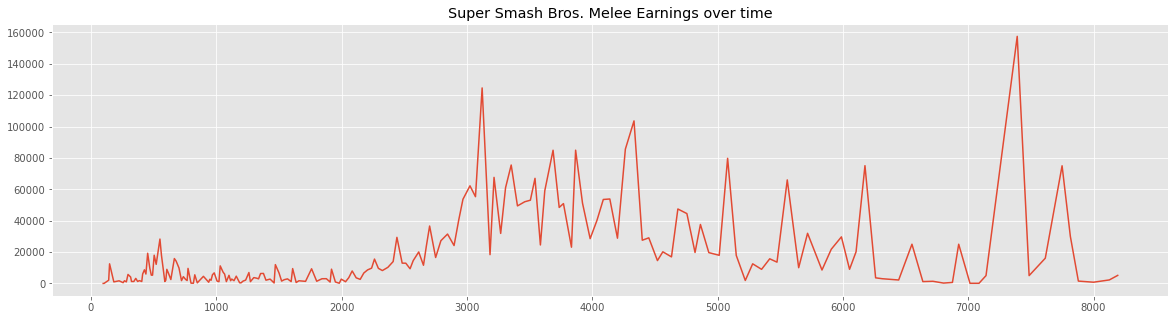

In [8]:
hist.loc[hist['Game'] == 'Super Smash Bros. Melee'].sort_values('Date')['Earnings'].plot(figsize=(20,5),title='Super Smash Bros. Melee Earnings over time')

### Get sns color palette 

In [9]:
pal = sns.color_palette()

### Draw top 10 game earnings over time historical data 

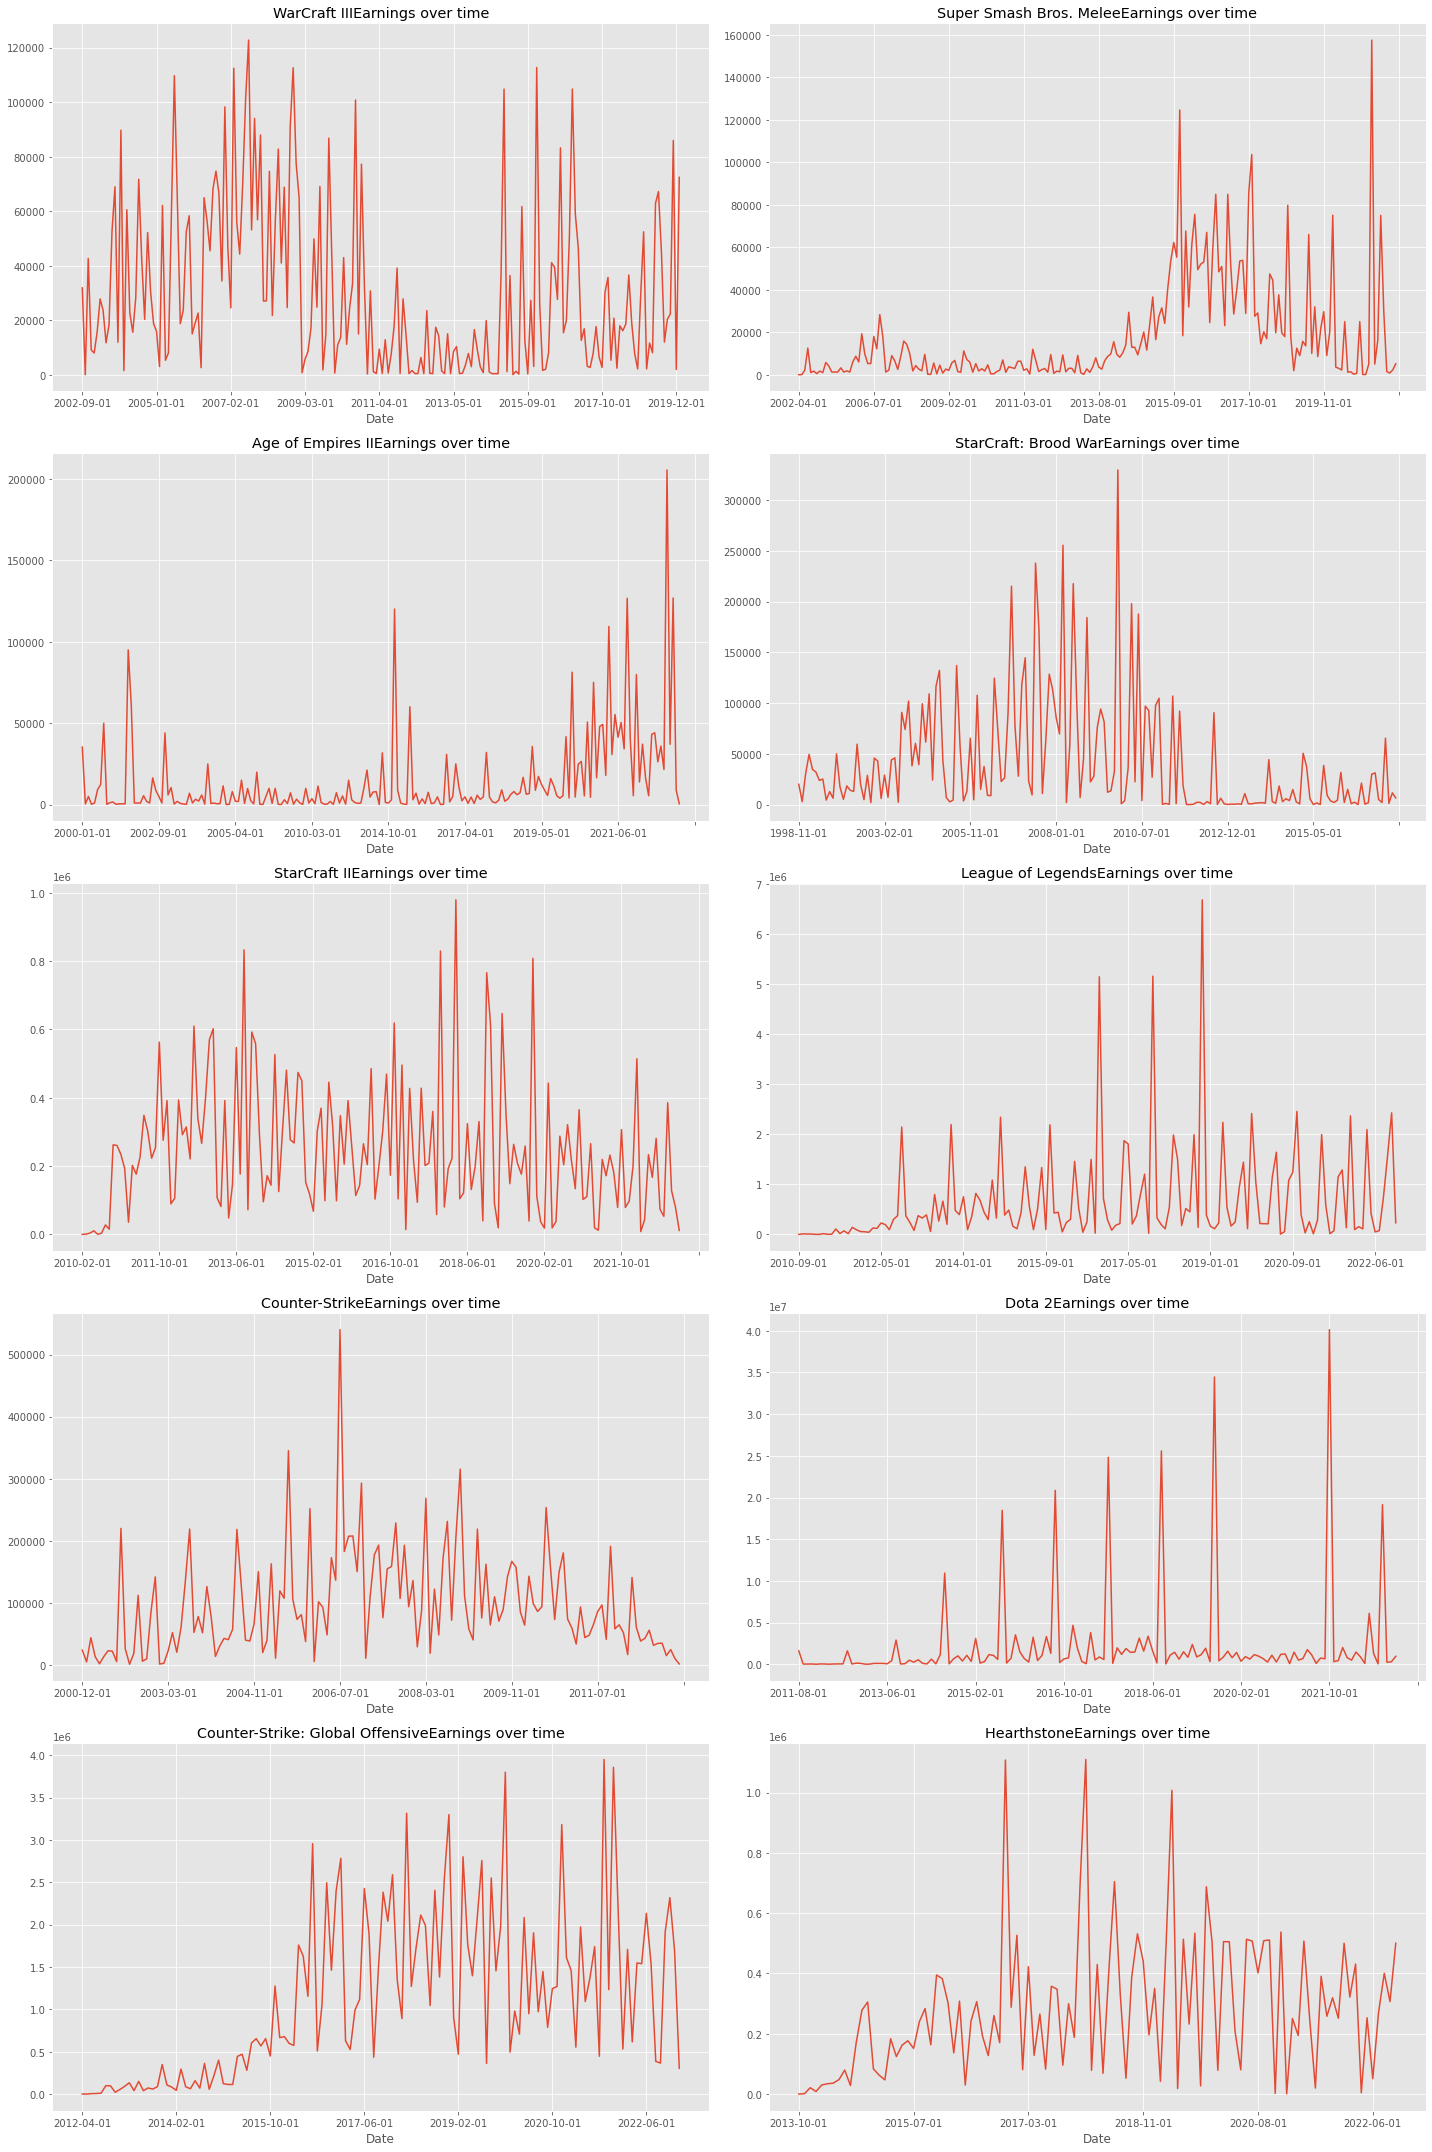

In [10]:
top10game = hist['Game'].value_counts().head(10).index
fig , axs = plt.subplots(5,2, figsize=(30,30))
axs = axs.flatten()
for index,game in enumerate(top10game):
    hist.loc[hist['Game'] == game].sort_values('Date').set_index('Date')['Earnings'].plot(ax=axs[index],
        figsize=(20, 30), title=f'{game}Earnings over time')
plt.tight_layout()
plt.show()


### Group by Year , Game ,and sum (Earnings) and plot it out

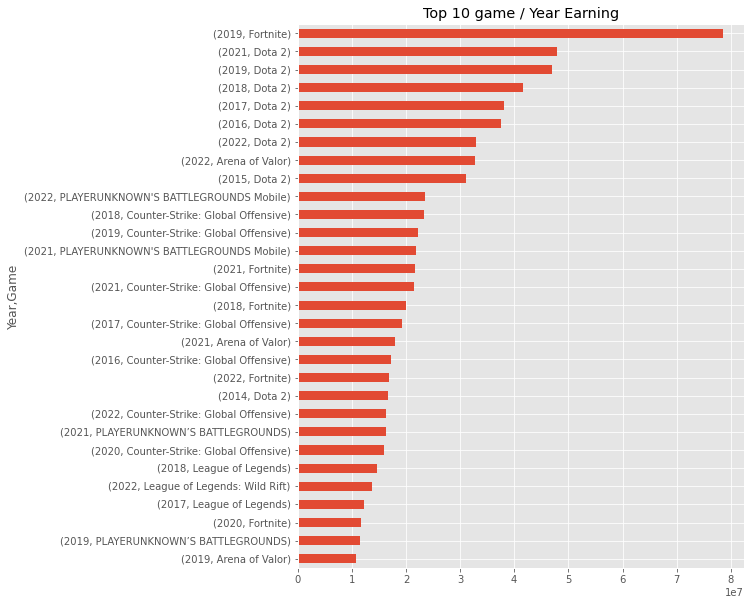

In [19]:
hist['Date'] = pd.to_datetime(hist['Date'])
hist['Year'] = hist['Date'].dt.year

hist.groupby(['Year','Game'])['Earnings'].sum().sort_values(ascending=False).head(30).sort_values().plot(kind='barh',figsize=(8,10),title='Top 10 game / Year Earning')

In [31]:
df_plot = hist.groupby(['Year','Game'])['Earnings'].sum().sort_values(ascending=False).head(30).reset_index()

df_plot.head(5)


,Year,Game,Earnings
0,2019,Fortnite,78530254.01
1,2021,Dota 2,47959899.31
2,2019,Dota 2,47061634.99
3,2018,Dota 2,41532197.26
4,2017,Dota 2,38074599.32


### Rename for long title to short title , and make new col called "Game_Year" , set it to index for plotting

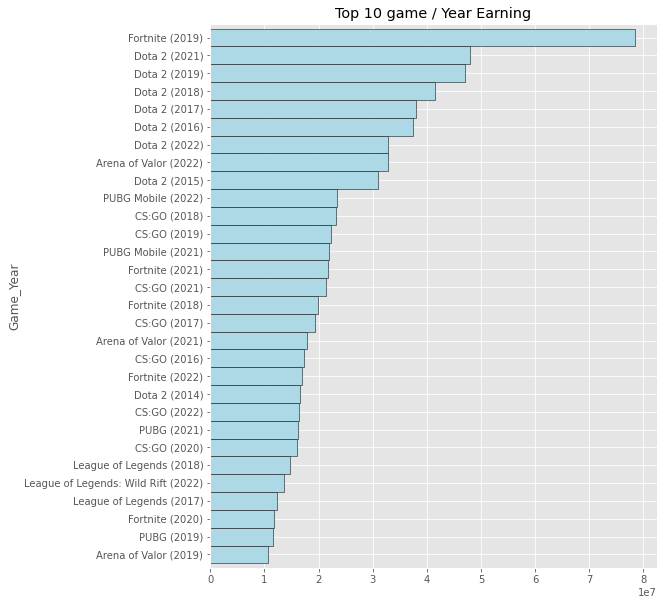

In [76]:
df_plot = df_plot.replace({'Game': {"Counter-Strike: Global Offensive": "CS:GO", "PLAYERUNKNOWN’S BATTLEGROUNDS": "PUBG", "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile":"PUBG Mobile"}})
df_plot['Game_Year'] = df_plot['Game'] + ' (' + df_plot['Year'].astype('str') + ')'

df_plot.set_index('Game_Year')['Earnings'].sort_values().plot(kind='barh', figsize=(
    8, 10), color='lightblue', width=1, edgecolor='black', title='Top 10 game / Year Earning')
